# Aula 1

## Vídeo 1.2 - Biblioteca e os dados

GeoPandas é uma biblioteca de código aberto em Python que facilita a manipulação e análise de dados geoespaciais. Ela estende a funcionalidade da biblioteca pandas, amplamente usada para manipulação de dados, adicionando suporte para operações geoespaciais. Isso inclui a capacidade de ler e escrever diferentes formatos de arquivo geoespaciais (como Shapefiles, GeoJSON, etc.), realizar operações geoespaciais (como união espacial, interseção, etc.), e criar visualizações geoespaciais. A GeoPandas integra-se bem com outras bibliotecas Python amplamente utilizadas, como Matplotlib para visualização e NumPy para manipulação de dados numéricos. Ao proporcionar uma interface de alto nível e fácil de usar para operações geoespaciais complexas, a GeoPandas tornou-se uma ferramenta importante para geocientistas, urbanistas e outros que trabalham com dados geoespaciais.

In [1]:
#!pip install geopandas

In [2]:
import geopandas as gpd

https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais/15774-malhas.html

In [3]:
url = 'https://github.com/alura-cursos/curso_geopandas/raw/main/dados/RJ_Municipios_2022.shp'

In [4]:
rj = gpd.read_file(url)

In [5]:
type(rj)

geopandas.geodataframe.GeoDataFrame

In [6]:
rj.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,3300100,Angra dos Reis,RJ,813.420,"MULTIPOLYGON (((-44.51649 -23.03589, -44.51633..."
1,3300159,Aperibé,RJ,94.542,"POLYGON ((-42.11437 -21.61204, -42.11394 -21.6..."
2,3300209,Araruama,RJ,638.276,"POLYGON ((-42.28399 -22.93928, -42.28444 -22.9..."
3,3300225,Areal,RJ,110.724,"POLYGON ((-43.09004 -22.23844, -43.09135 -22.2..."
4,3300233,Armação dos Búzios,RJ,70.977,"MULTIPOLYGON (((-41.91872 -22.77162, -41.91854..."


<Axes: >

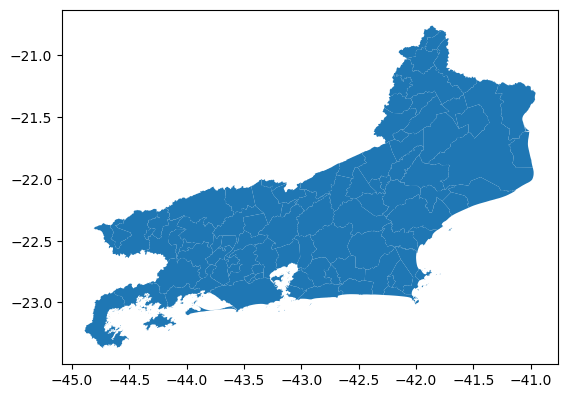

In [7]:
rj.plot()

<Axes: >

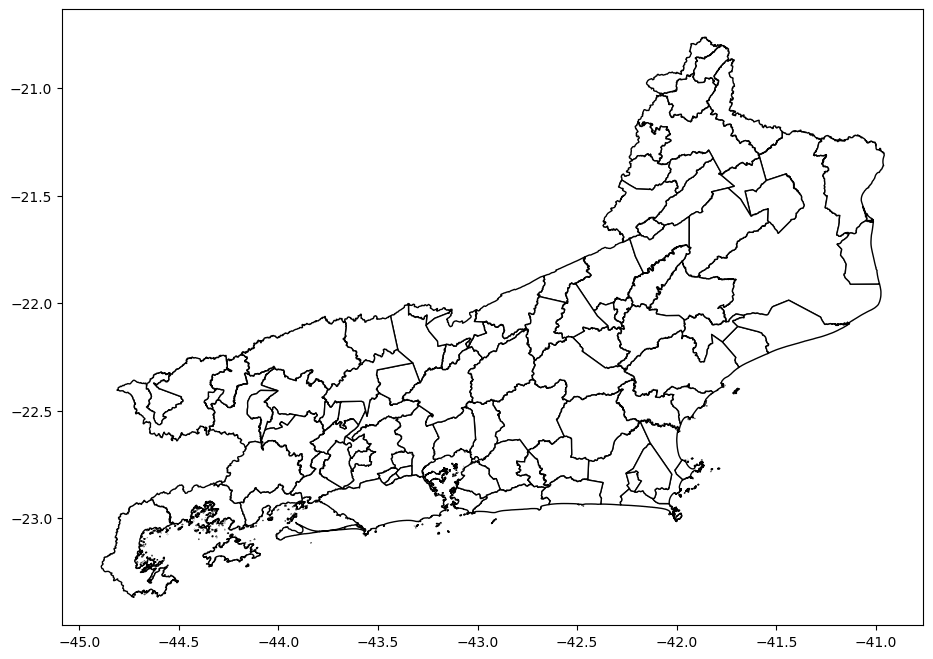

In [8]:
rj.plot(color='white',edgecolor='black',figsize=(15,8))

## Vídeo 1.3 - Trabalhando com Shapefiles

Shapefiles são um formato de arquivo de dados geoespaciais desenvolvido pela Esri, uma das principais empresas de software de Sistemas de Informação Geográfica (SIG). Eles são amplamente utilizados para armazenar dados de localização geográfica e atributos associados a essa localização. Um shapefile na verdade consiste em um conjunto de arquivos correlacionados (.shp, .shx, .dbf, e potencialmente outros) que juntos expressam vetores geoespaciais - pontos, linhas ou polígonos - juntamente com informações atributivas, que podem incluir detalhes como nomes, categorias e outras características associadas a cada entidade geográfica. Shapefiles são comumente usados em uma variedade de campos, incluindo urbanismo, geografia, logística, e muitos outros que requerem a análise e a visualização de dados geoespaciais.

<Axes: >

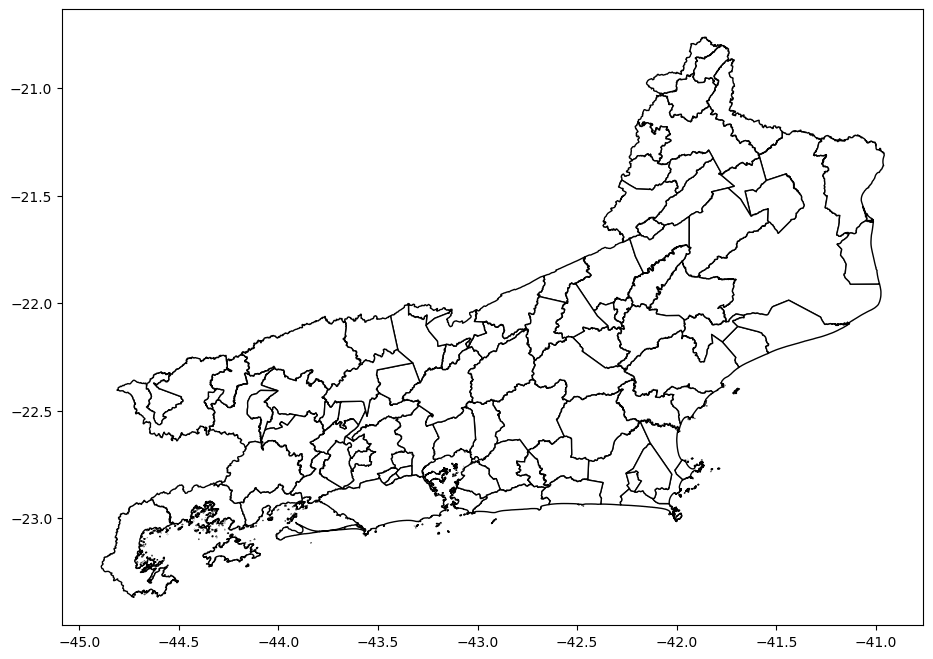

In [9]:
rj.plot(color='white',edgecolor='black',figsize=(15,8))

In [10]:
rj = rj[rj['NM_MUN']=='Rio de Janeiro']

In [11]:
rj

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
67,3304557,Rio de Janeiro,RJ,1200.329,"MULTIPOLYGON (((-43.66048 -22.99958, -43.6605 ..."


<Axes: >

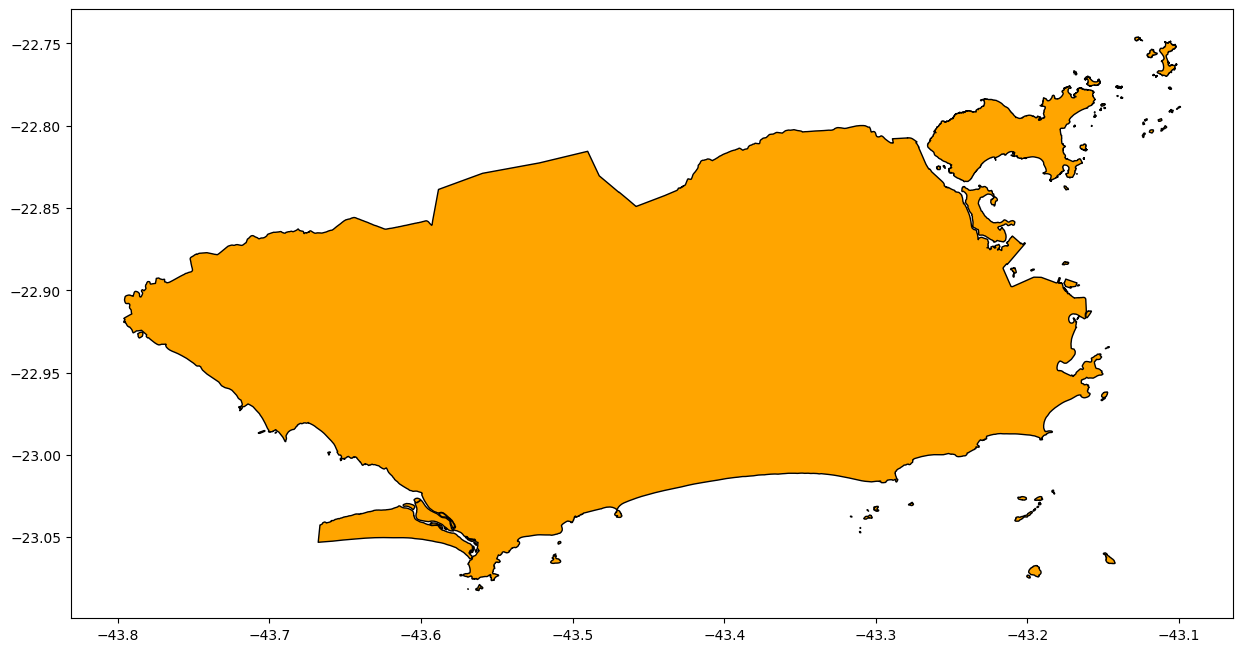

In [12]:
rj.plot(color='orange',edgecolor='black',figsize=(15,8))

In [13]:
rj.to_file('RJ-MUNIC.shp')

In [14]:
rj_munic = gpd.read_file('RJ-MUNIC.shp')

<Axes: >

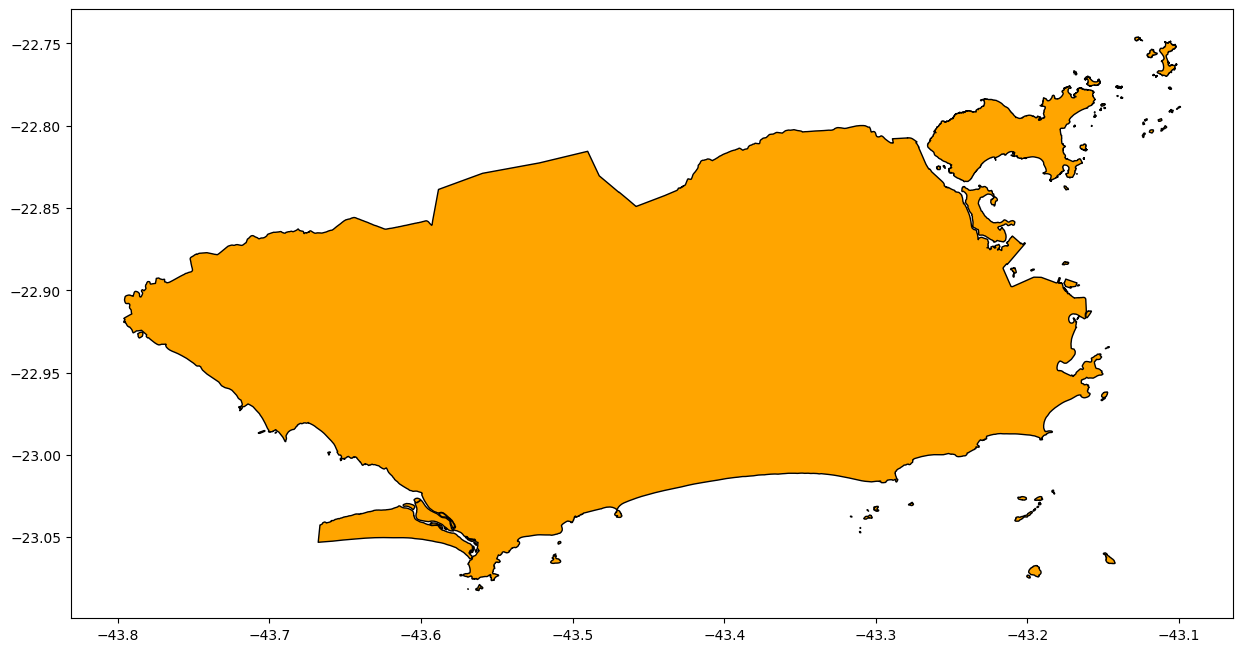

In [15]:
rj_munic.plot(color='orange',edgecolor='black',figsize=(15,8))

# Aula 2 - Sistemas de coordenadas


## Vídeo 2.1 - Preparando o dataframe

Latitude e longitude são utilizadas para localizar qualquer ponto na Terra. Latitude é uma medida de graus ao norte ou ao sul do equador, que é definido como 0 grau, com os pólos norte e sul sendo +90 e -90 graus, respectivamente. Longitude, por outro lado, mede graus a leste ou oeste do meridiano principal, conhecido como Meridiano de Greenwich, que é definido como 0 grau. Os graus de longitude vão de -180 a +180. Combinando uma coordenada de latitude e uma de longitude, podemos especificar a localização exata de qualquer ponto na Terra.

![](https://educa.ibge.gov.br/images/vamoscontar/atividades/mapa_mundo_coordenadas.jpg)

Fonte: https://educa.ibge.gov.br/professores/educa-atividades/17650-linhas-imaginarias.html

In [16]:
import pandas as pd

In [17]:
url = 'https://raw.githubusercontent.com/alura-cursos/curso_geopandas/main/dados/dados.csv'
df = pd.read_csv(url,sep='\t')

In [18]:
df.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000


In [19]:
type(df)

pandas.core.frame.DataFrame

In [20]:
x = zip(df['Longitude'],df['Latitude'])
x

In [21]:
list(x)

[(-43.4629464, -23.0164552),
 (-43.3369111, -22.9431995),
 (-43.300517, -22.873849),
 (-43.4127033, -22.9847874),
 (-51.92528, -14.235004),
 (-43.4775047, -23.0189271),
 (-43.2471087, -22.9335749),
 (-43.192534, -22.9823004),
 (-51.92528, -14.235004),
 (-43.175411, -22.9364023),
 (-43.262945, -22.918533),
 (-49.0606445, -26.9225709),
 (-43.303056, -23.013213),
 (-43.1698189, -22.952982),
 (-43.1849587, -22.9706444),
 (-43.3548121, -23.0097423),
 (-49.0606445, -26.9225709),
 (-43.3461644, -22.938107),
 (-43.1819538, -22.9497255),
 (-43.2327966, -22.9218818),
 (-43.3939698, -22.9995191),
 (-43.2808515, -22.9055097),
 (-43.1875152, -22.934498),
 (-43.5016663, -23.0191083),
 (-43.4590496, -23.023215),
 (-43.2339034, -22.9936095),
 (-43.1987716, -22.985368),
 (-43.2308106, -22.9771863),
 (-43.2525968, -22.9267666),
 (-51.92528, -14.235004),
 (-43.1852932, -22.9705243),
 (-43.4178323, -22.9990708),
 (-43.3079711, -23.0141101),
 (-43.350626, -22.988612),
 (-43.4152111, -22.9980081),
 (-43.199

In [22]:
from shapely import Point

In [23]:
pontos_geometricos = [Point(x) for x in zip(df['Longitude'],df['Latitude'])]

In [24]:
pontos_geometricos

[<POINT (-43.463 -23.016)>,
 <POINT (-43.337 -22.943)>,
 <POINT (-43.301 -22.874)>,
 <POINT (-43.413 -22.985)>,
 <POINT (-51.925 -14.235)>,
 <POINT (-43.478 -23.019)>,
 <POINT (-43.247 -22.934)>,
 <POINT (-43.193 -22.982)>,
 <POINT (-51.925 -14.235)>,
 <POINT (-43.175 -22.936)>,
 <POINT (-43.263 -22.919)>,
 <POINT (-49.061 -26.923)>,
 <POINT (-43.303 -23.013)>,
 <POINT (-43.17 -22.953)>,
 <POINT (-43.185 -22.971)>,
 <POINT (-43.355 -23.01)>,
 <POINT (-49.061 -26.923)>,
 <POINT (-43.346 -22.938)>,
 <POINT (-43.182 -22.95)>,
 <POINT (-43.233 -22.922)>,
 <POINT (-43.394 -23)>,
 <POINT (-43.281 -22.906)>,
 <POINT (-43.188 -22.934)>,
 <POINT (-43.502 -23.019)>,
 <POINT (-43.459 -23.023)>,
 <POINT (-43.234 -22.994)>,
 <POINT (-43.199 -22.985)>,
 <POINT (-43.231 -22.977)>,
 <POINT (-43.253 -22.927)>,
 <POINT (-51.925 -14.235)>,
 <POINT (-43.185 -22.971)>,
 <POINT (-43.418 -22.999)>,
 <POINT (-43.308 -23.014)>,
 <POINT (-43.351 -22.989)>,
 <POINT (-43.415 -22.998)>,
 <POINT (-43.199 -22.981)>,

In [25]:
crs = {'proj': 'latlong', 'ellps':'WGS84', 'datum': 'WGS84','no_defs':True}
geo_dados = gpd.GeoDataFrame(df, crs=crs, geometry=pontos_geometricos)

In [26]:
geo_dados.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (-43.46295 -23.01646)
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (-43.33691 -22.9432)
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (-43.30052 -22.87385)
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (-43.4127 -22.98479)
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000,POINT (-51.92528 -14.235)


In [27]:
geo_dados.to_file('DATASET.shp')

<Axes: >

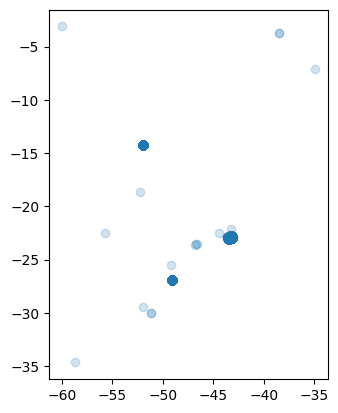

In [28]:
geo_dados.plot(alpha=0.2)

## Vídeo 2.2 - Sistema de coordenadas

In [29]:
rj.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [30]:
geo_dados.crs

<Geographic 2D CRS: +proj=latlong +ellps=WGS84 +datum=WGS84 +no_defs + ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Vídeo 2.3 - Modificando o sistemas de coordenadas

🤖 Qual a zona UTM em que o município do Rio de Janeiro está inserido?

R: Zona UTM 23S

🤖 Qual o EPSG para zona UTM 23S utilizando o SIRGAS 2000?

R: EPSG 31983

https://www.spatialreference.org/

In [31]:
rj = rj.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [32]:
geo_dados = geo_dados.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [33]:
rj.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS 1980 ellipsoid using towgs84=0,0,0,0,0,0,0
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

In [34]:
geo_dados.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS 1980 ellipsoid using towgs84=0,0,0,0,0,0,0
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

<Axes: >

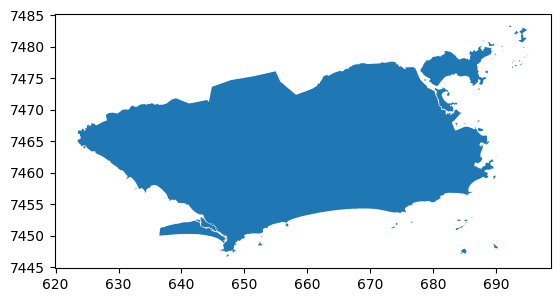

In [35]:
rj.plot()

# Aula 3 - Filtrando imóveis por região

## Vídeo 3.1 - Identificando outliers

<Axes: >

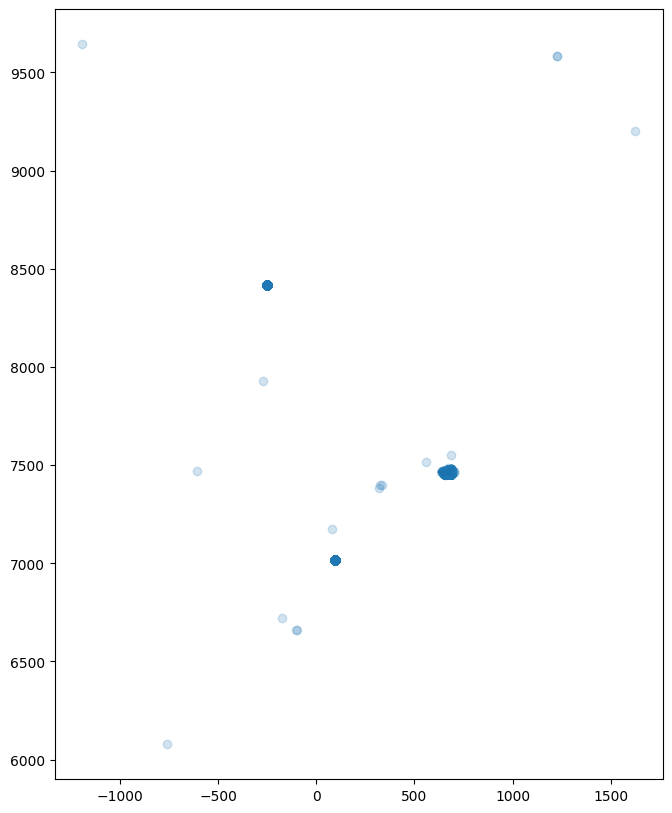

In [36]:
base = rj.plot(color='black',edgecolor='black',figsize=(15,10))
geo_dados.plot(ax=base,figsize=(15,10),alpha=0.2)

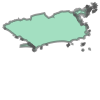

In [37]:
rj.iloc[0].geometry

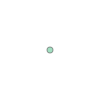

In [38]:
geo_dados.iloc[0].geometry

In [39]:
geo_dados.iloc[0].geometry.within(rj.iloc[0].geometry)

True

## Vídeo 3.2 - Selecionando dados em uma região

In [40]:
geo_dados['geometry'].within(rj.iloc[0].geometry)

0        True
1        True
2        True
3        True
4       False
        ...  
4995     True
4996     True
4997     True
4998     True
4999     True
Length: 5000, dtype: bool

In [41]:
geo_dados.shape[0]

5000

In [42]:
geo_dados = geo_dados[geo_dados['geometry'].within(rj.iloc[0].geometry)]

In [75]:
geo_dados.shape[0]

4513

<Axes: >

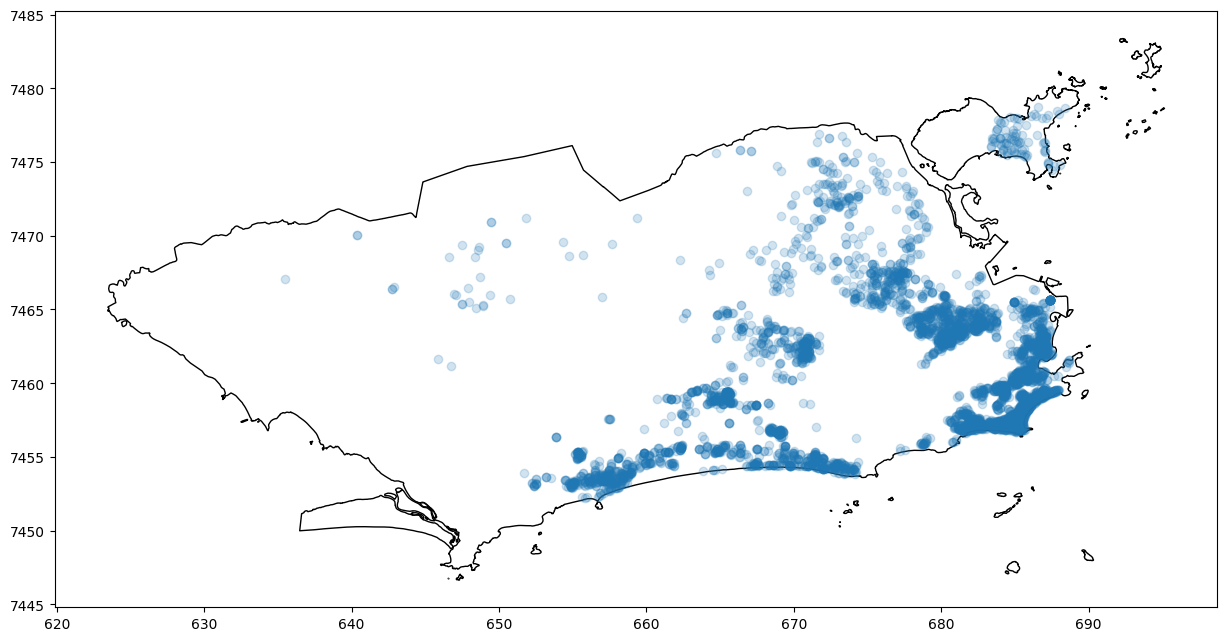

In [44]:
base = rj.plot(color='white',edgecolor='black',figsize=(15,10))
geo_dados.plot(ax=base,figsize=(15,10),alpha=0.2)

## Vídeo 3.3 - Acrescentando estações do metrô

https://www.data.rio/

https://www.data.rio/datasets/PCRJ::esta%C3%A7%C3%B5es-metr%C3%B4/explore?location=-22.843796%2C-43.262511%2C11.95

In [45]:
url_m = 'https://github.com/alura-cursos/curso_geopandas/raw/main/dados/metro.geojson'

In [46]:
metro = gpd.read_file(url_m)

In [47]:
metro.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [48]:
metro = metro.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [49]:
metro.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS 1980 ellipsoid using towgs84=0,0,0,0,0,0,0
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

<Axes: >

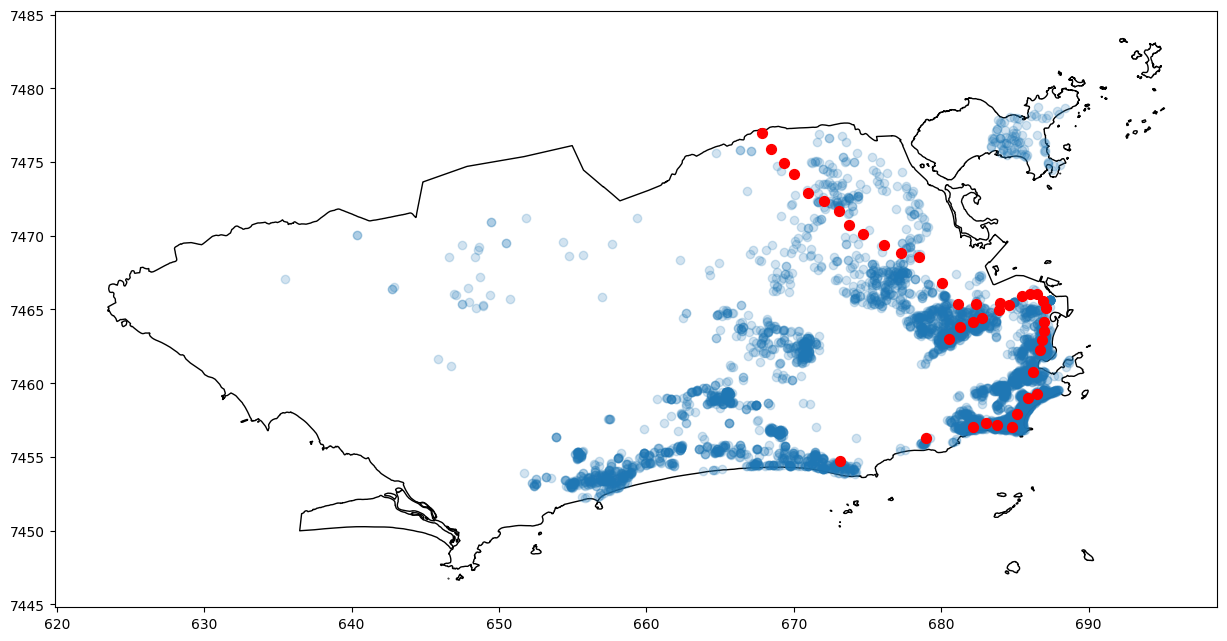

In [50]:
base = rj.plot(color='white',edgecolor='black',figsize=(15,10))
geo_dados.plot(ax=base,figsize=(15,10),alpha=0.2)
metro.plot(ax=base, color='red',markersize=50)

# Aula 4 - Calculando distâncias

## Vídeo 4.1 - Estação do metrô mais próxima

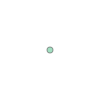

In [51]:
geo_dados.iloc[0].geometry

In [52]:
distancias = metro.distance(geo_dados.iloc[0].geometry)

In [53]:
type(distancias)

pandas.core.series.Series

In [54]:
distancias.min()

15.618532512237714

In [55]:
geo_dados['Dist_metro'] = geo_dados['geometry'].apply(lambda x: metro.distance(x).min())

In [56]:
geo_dados.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry,Dist_metro
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.514 7453.832),15.618533
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.524 7461.803),7.530548
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.345 7469.44),0.733846
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.701 7457.284),10.714158
5,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,POINT (656.019 7453.574),17.126742


In [57]:
import numpy as np
geo_dados_num = geo_dados.select_dtypes(include=[np.number])
correlacao = geo_dados_num.corr()

<Axes: >

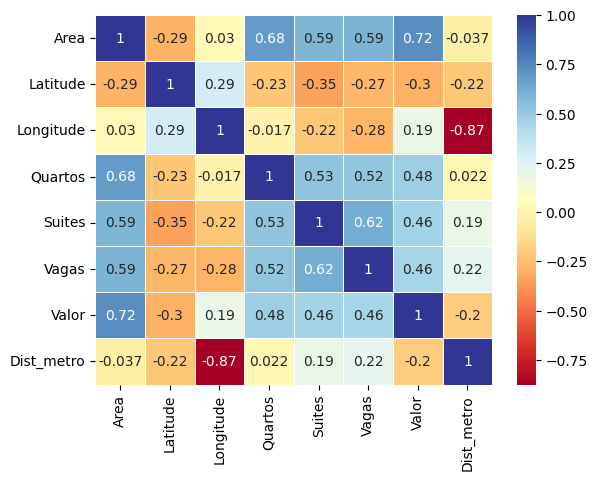

In [58]:
import seaborn as sns
sns.heatmap(correlacao, annot=True, cmap='RdYlBu', linewidths=0.5)

## Vídeo 4.2 - Agregando dados de transportes

In [ ]:
url_t = 'https://github.com/alura-cursos/curso_geopandas/raw/main/dados/trem.geojson'

In [84]:
trem = gpd.read_file(url_t)
trem = trem.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [61]:
url_b = 'https://github.com/alura-cursos/curso_geopandas/raw/main/dados/brt.geojson'

brt = gpd.read_file(url_b)
brt = brt.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [62]:
trem = trem[trem.within(rj.iloc[0].geometry)]
brt = brt[brt.within(rj.iloc[0].geometry)]

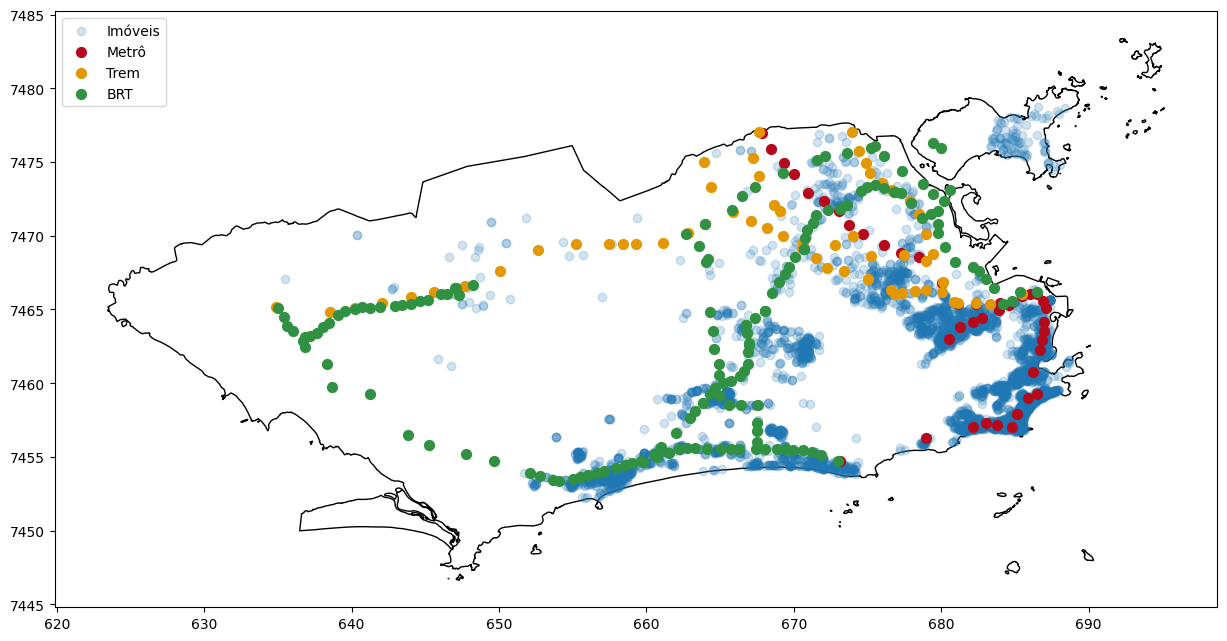

In [63]:
base = rj.plot(color='white',edgecolor='black',figsize=(15,10))
geo_dados.plot(ax=base,figsize=(15,10),alpha=0.2)
metro.plot(ax=base, color='#b60a1c',markersize=50)
trem.plot(ax=base, color='#e39802',markersize=50)
brt.plot(ax=base, color='#309143',markersize=50)

base.legend(['Imóveis','Metrô','Trem','BRT'],loc='upper left')

In [64]:
transporte = pd.concat([trem.geometry,metro.geometry,brt.geometry],ignore_index = True)

In [65]:
type(transporte)

geopandas.geoseries.GeoSeries

In [66]:
geo_dados['Dist_Transporte'] = geo_dados['geometry'].apply(lambda x: transporte.distance(x).min())

In [67]:
geo_dados.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry,Dist_metro,Dist_Transporte
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.514 7453.832),15.618533,0.446165
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.524 7461.803),7.530548,3.646744
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.345 7469.44),0.733846,0.642670
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.701 7457.284),10.714158,0.418512
5,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,POINT (656.019 7453.574),17.126742,0.212248


In [68]:
geo_dados_num = geo_dados.select_dtypes(include=[np.number])
correlacao = geo_dados_num.corr()

<Axes: >

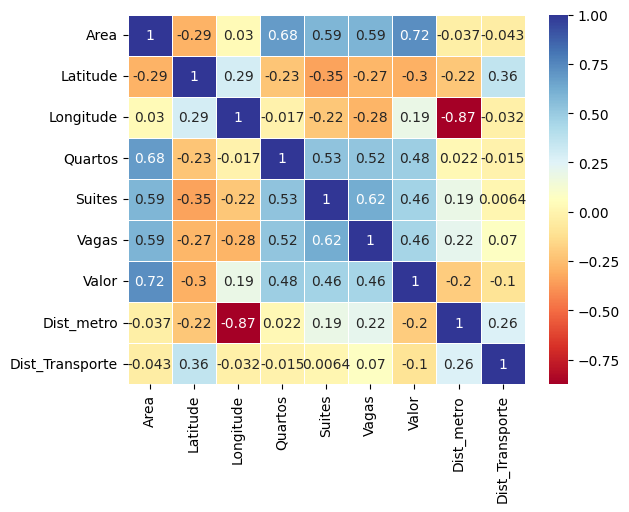

In [69]:
sns.heatmap(correlacao, annot=True, cmap='RdYlBu', linewidths=0.5)

## Vídeo 4.3 - Calculando a distância até a praia

In [85]:
url_p = 'dados/Cobertura_Vegetal_e_Uso_da_Terra_2018.geojson'

In [86]:
praias = gpd.read_file(url_p)

In [87]:
praias.head()

,objectid,grupo,classe,formacoes,estagio_sucessional,sigla,ano,legenda,smac_,st_areashape,st_perimetershape,geometry
0,49465,Outros,Corpos d’água continentais,,,Con,2018-06-01 00:00:00+00:00,Corpos d’água continentais,8684.151722,8684.152076,431.969730,"POLYGON ((-43.56631 -23.06286, -43.56616 -23.0..."
1,49466,Outros,Corpos d’água continentais,,,Con,2018-06-01 00:00:00+00:00,Corpos d’água continentais,2209.349128,2209.347164,241.436675,"POLYGON ((-43.59629 -23.04797, -43.5964 -23.04..."
2,49467,Outros,Corpos d’água continentais,,,Con,2018-06-01 00:00:00+00:00,Corpos d’água continentais,17015.388810,17015.386794,468.729476,"POLYGON ((-43.59742 -23.04846, -43.59725 -23.0..."
3,49468,Outros,Corpos d’água continentais,,,Con,2018-06-01 00:00:00+00:00,Corpos d’água continentais,17597.587072,17597.571083,916.464380,"POLYGON ((-43.60753 -23.04328, -43.60773 -23.0..."
4,49469,Antropismo,Vegetação gramíneo-lenhosa,,,Vg,2018-06-01 00:00:00+00:00,Vegetação gramíneo-lenhosa,11834.907080,11834.901131,605.329904,"POLYGON ((-43.5712 -23.0593, -43.57117 -23.059..."


In [88]:
praias.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [89]:
praias = praias.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [90]:
praias.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS 1980 ellipsoid using towgs84=0,0,0,0,0,0,0
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

<Axes: >

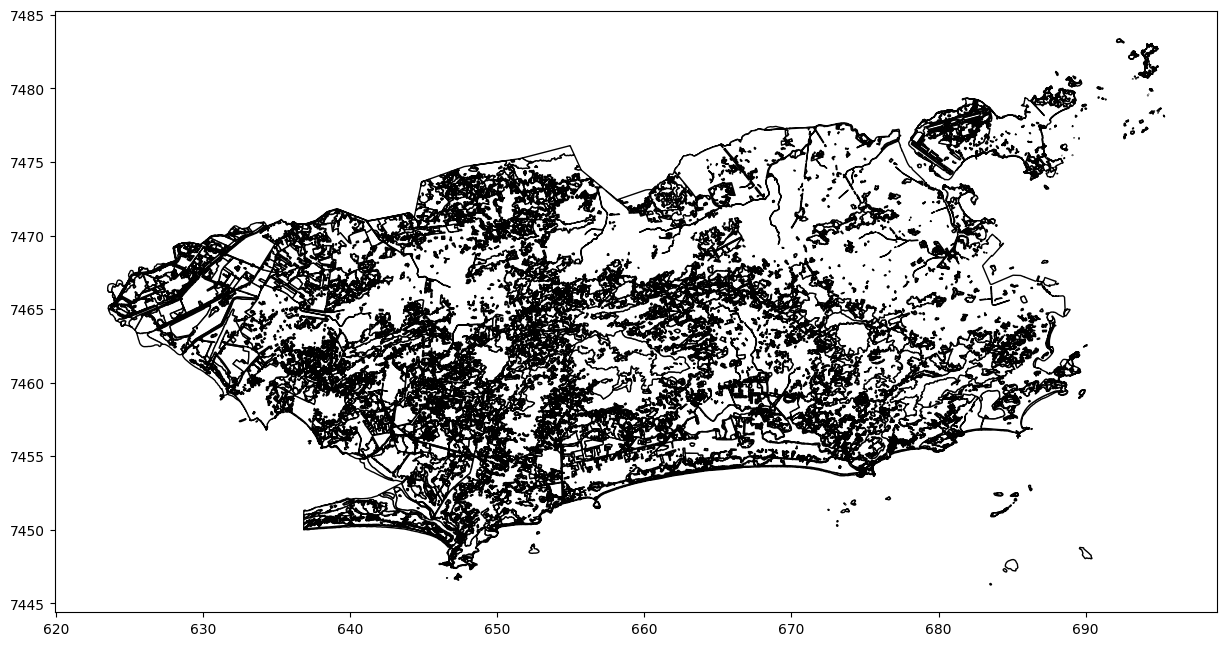

In [91]:
praias.plot(color='white',edgecolor='black',figsize=(15,8))

In [92]:
praias['classe'].unique()

array(['Corpos d’água continentais', 'Vegetação gramíneo-lenhosa',
       'Formação Pioneira com influência marinha',
       'Vegetação arbórea não florestal', 'Áreas Urbanas', 'Praia',
       'Formação Pioneira com influência flúvio-marinh',
       'Formação Pioneira com influência flúvio-lacust', 'Uso agrícola',
       'Floresta Ombrófila Densa', 'Afloramento Rochoso', 'Solo exposto',
       'Reflorestamento', 'Atividades de Extração Mineral',
       'Corpos d’água costeiros'], dtype=object)

In [93]:
praias = praias[praias['classe'] == 'Praia']

<Axes: >

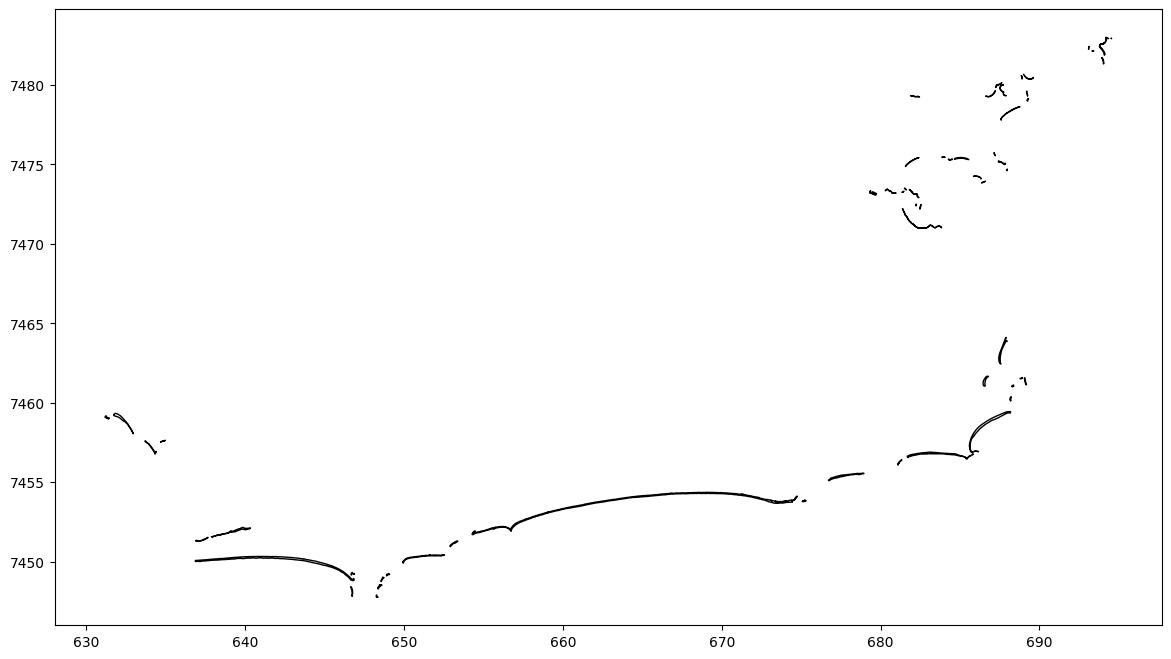

In [94]:
praias.plot(color='white',edgecolor='black',figsize=(15,8))

<Axes: >

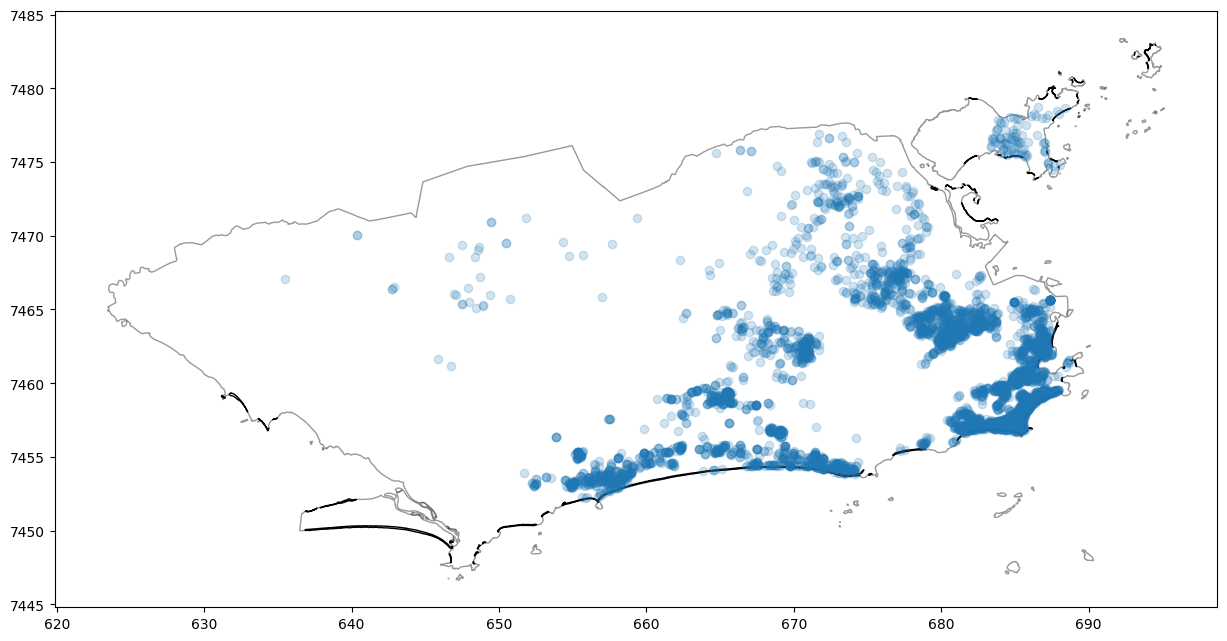

In [95]:
base = rj.plot(color='white',edgecolor='black',alpha=0.4,figsize=(15,10))
praias.plot(ax=base,color='white',edgecolor='black')
geo_dados.plot(ax=base,figsize=(15,10),alpha=0.2)

In [96]:
geo_dados['Dist_Praia'] = geo_dados['geometry'].apply(lambda x: praias.distance(x).min())

In [97]:
geo_dados_num = geo_dados.select_dtypes(include=[np.number])
correlacao = geo_dados_num.corr()

<Axes: >

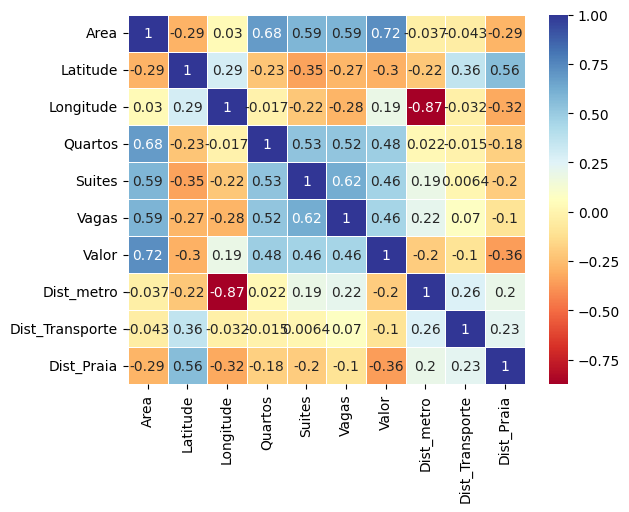

In [98]:
sns.heatmap(correlacao, annot=True, cmap='RdYlBu', linewidths=0.5)

<Axes: xlabel='Dist_Praia', ylabel='Valor'>

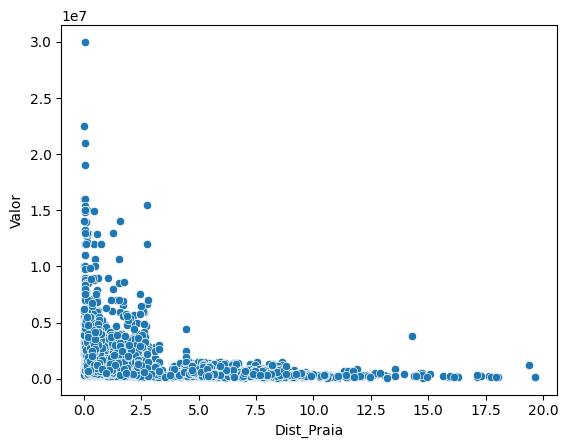

In [99]:
sns.scatterplot(x='Dist_Praia',y='Valor',data=geo_dados)